# A faire

- Vérifier qu'on peut bien tracer des moyennes, et si oui, comment sont-elles calculées ? Comprendre les méthodes directes et indirectes...
- VERIFIER ABSOLUMENT la fonction de groupage

# Importations

## Packages

In [1]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inégalités sociales face aux maladies chroniques (ER 1243)

In [2]:
url_drees = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/er_inegalites_maladies_chroniques/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

urlData = requests.get(url_drees).content
df_drees = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep = ";")
df_drees.head(5)

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.000499,1.374418e+06,0.009910,0.014240,0.013046,0.015435,0.014738,0.013555,0.015921
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.502030,1.374418e+06,0.022472,0.031912,0.030194,0.033631,0.033026,0.031317,0.034736
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.669891,1.374418e+06,0.004717,0.006956,0.006101,0.007810,0.007021,0.006193,0.007848
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.348333,1.374418e+06,0.001514,0.001515,0.001182,0.001847,0.001693,0.001332,0.002054
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.531100,1.374418e+06,0.003243,0.003526,0.002986,0.004066,0.003521,0.003009,0.004032


### Pour comprendre la structure de la table :

In [3]:
list(set(df_drees['varPartition']))

[nan, 'FISC_REG_S', 'SEXE']

In [4]:
list(set(df_drees['varGroupage']))

[nan,
 'FISC_NIVVIEM_E2015_S_moy_10',
 'EAR_DIPLR_S',
 'SEXE',
 'EAR_GS_S',
 'classeAge10']

### Pour tracer quelques barplots

In [5]:
def selection_variable_barplot(liste_var_groupage, liste_var_partition, type_var_groupage = float, type_var_partition = float, groupby = 'valGroupage') :
    # On commence par ne sélectionner que les variables qu'on souhaite
    sous_df = df_drees[(df_drees['varGroupage'].isin(liste_var_groupage))
                           &(df_drees['varPartition'].isin(liste_var_partition))
                           ].copy()
    # On vérifie les types
    sous_df = sous_df.astype({'valPartition' : type_var_partition, 'valGroupage' : type_var_groupage},  errors='ignore')
    
    # On fait le groupby + l'opération voulue
    grouped_df = sous_df.groupby(groupby, as_index = False).mean()
    grouped_df = grouped_df.sort_values(by = groupby)
    
    return grouped_df

### Exemples 

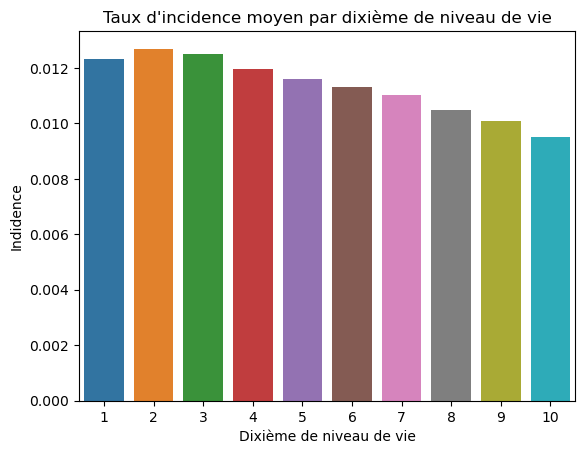

In [6]:
# Le taux d'incidence moyen par dixième de niveau de vie

df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = 'valGroupage'
                                   )

sns.barplot(data=df_loc, x= "valGroupage" , y="txStandDir")
plt.title('Taux d\'incidence moyen par dixième de niveau de vie')
plt.xlabel('Dixième de niveau de vie')
plt.ylabel('Indidence')
# sns.despine()
plt.show()

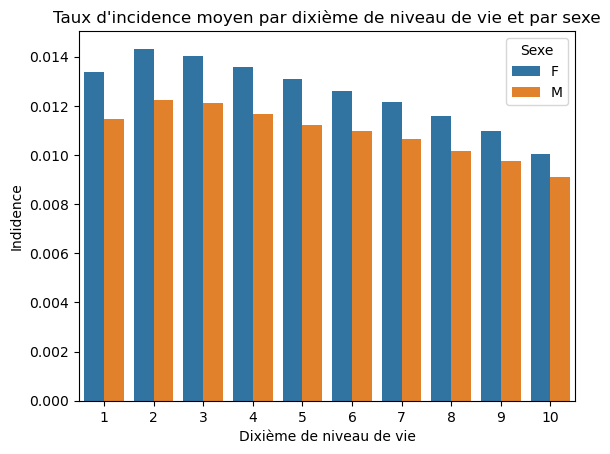

In [7]:
# On ventile par sexe

df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'valPartition']
                                   )


df_loc = df_loc.rename(columns = {'valPartition' : 'Sexe'})
sns.barplot(data=df_loc, x= "valGroupage", y="txStandDir", hue = 'Sexe')
plt.title('Taux d\'incidence moyen par dixième de niveau de vie et par sexe')
plt.xlabel('Dixième de niveau de vie')
plt.ylabel('Indidence')
# sns.despine()
plt.show()

# Brouillon : on essaie de faire une carte !

In [9]:
import geopandas as gpd
!pip install contextily
import contextily as ctx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 14.0 MB/s eta 0:00:0000:0100:01


In [23]:
import geopandas as gpd
# Pour télécharger le fond de carte : https://github.com/gregoiredavid/france-geojson/blob/master/regions-version-simplifiee.geojson'
# A voir si on peut le push sur git, et si on ne peut pas le télécharger automatiquement à chaque fois...

sf = gpd.read_file('regions-version-simplifiee.geojson')
sf

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.63327 49.10838, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.88845 47.50943, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.57569 46.74952, ..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.07822 49.38849..."
4,32,Hauts-de-France,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
5,44,Grand Est,"POLYGON ((4.23316 49.95775, 4.30810 49.96952, ..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.45849 47.44812, -2.45343 47..."
7,53,Bretagne,"MULTIPOLYGON (((-3.65914 48.65921, -3.63649 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.41519 46.34722, 1.43538 46.3..."
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.77316 42.5..."


Tout d'abord la carte de France et des régions


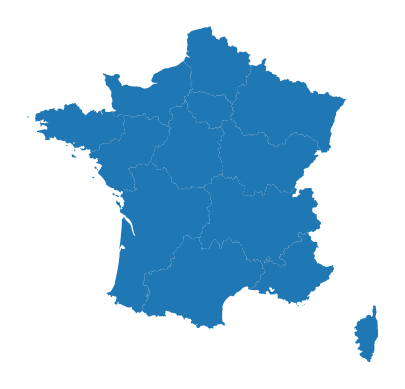

In [13]:
ax = sf.plot()
ax.set_axis_off()
print("Tout d'abord la carte de France et des régions")

In [25]:
df_par_region.head()

,valPartition,I_cat,valGroupage,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,1,0.211538,5.5,728.098108,7.404203e+04,0.009538,0.009362,0.006888,0.011836,0.009422,0.006990,0.011854
1,2,0.211538,5.5,710.627362,7.123292e+04,0.009816,0.009571,0.007063,0.012078,0.009799,0.007282,0.012315
2,3,0.211538,5.5,278.382673,4.973445e+04,0.005790,0.005367,0.002750,0.007984,0.005832,0.003010,0.008654
3,4,0.211538,5.5,1381.699248,1.624703e+05,0.007971,0.007905,0.006276,0.009533,0.008026,0.006404,0.009648
4,11,0.211538,5.5,22812.817336,2.324810e+06,0.009541,0.009830,0.009353,0.010307,0.009854,0.009383,0.010325


In [28]:
df_par_region = selection_variable_barplot(
                        liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                        liste_var_partition = ['FISC_REG_S'],
                        type_var_groupage = int,
                        type_var_partition = object,
                        groupby = 'valPartition'
                        )

# df_par_region = df_par_region.rename(columns = {'valPartition' : 'code'})

df_merged_par_region = sf.copy().merge(df_par_region, left_on = 'code', right_on = 'valPartition', left_index=False, right_index=False, how = 'left')

In [30]:
df_merged_par_region.head()

,code,nom,geometry,valPartition,I_cat,valGroupage,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.63327 49.10838, ...",11,0.211538,5.5,22812.817336,2.324810e+06,0.009541,0.009830,0.009353,0.010307,0.009854,0.009383,0.010325
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.88845 47.50943, ...",24,0.211538,5.5,6266.987099,4.978624e+05,0.012386,0.012447,0.011368,0.013526,0.012443,0.011394,0.013493
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.57569 46.74952, ...",27,0.211538,5.5,7105.588285,5.443728e+05,0.012803,0.012876,0.011833,0.013919,0.012846,0.011830,0.013862
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.07822 49.38849...",28,0.211538,5.5,8546.690886,6.441351e+05,0.013052,0.013088,0.012112,0.014064,0.013188,0.012235,0.014141
4,32,Hauts-de-France,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",32,0.211538,5.5,14956.279149,1.157415e+06,0.012706,0.012534,0.011828,0.013239,0.012558,0.011871,0.013245


<AxesSubplot:>

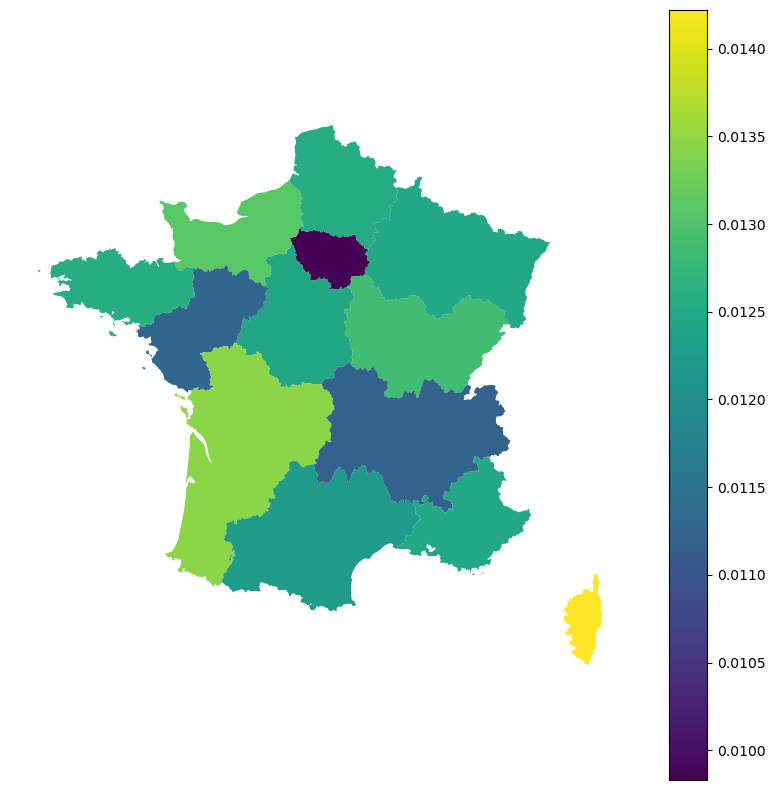

In [37]:
fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region.plot(ax = ax, column = "txStandDir", legend=True)
ax.set_axis_off()
ax

### On rajoute les noms de régions

/tmp/ipykernel_133/2965111870.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_merged_par_region["centre_regions"] = df_merged_par_region.centroid


<AxesSubplot:>

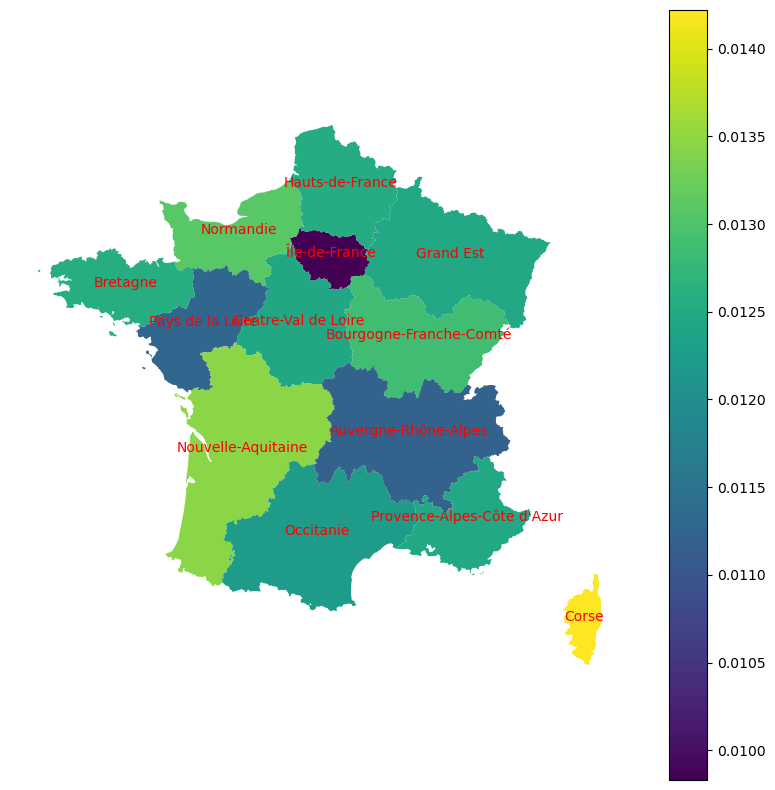

In [60]:
df_merged_par_region["centre_regions"] = df_merged_par_region.centroid




fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region.plot(ax = ax, column = "txStandDir", legend=True)

for num_ligne in range(len(df_merged_par_region)) :
    ligne = df_merged_par_region.iloc[num_ligne]
    x = ligne['centre_regions'].x
    y = ligne['centre_regions'].y
    ax.annotate(ligne["nom"], xy = (x, y), xytext = (0, 0), textcoords="offset points", ha='center', color='red')

ax.set_axis_off()
ax

# for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# Brouillon là-dessous

In [ ]:
import cartiflette.s3

shp_communes = cartiflette.s3.download_vectorfile_url_all(
    values = ["75", "92", "93", "94"],
    level="COMMUNE",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

shp_communes.head()

ax = shp_communes.plot()
ax.set_axis_off()

In [99]:
import geopandas as gpd
!pip install contextily
import contextily as ctx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 18.6 MB/s eta 0:00:00


In [117]:
!pip install geoviews

In [116]:
pip install typing-extensions --upgrade

Note: you may need to restart the kernel to use updated packages.


In [119]:
conda install -c pyviz hvplot

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.


In [118]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh')

ImportError: cannot import name 'TypeGuard' from 'typing_extensions' (/opt/mamba/lib/python3.9/site-packages/typing_extensions.py)

In [108]:
pip install pygal_maps_fr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 kB 9.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 28.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [110]:
import pygal

fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Some departments'
fr_chart.add('Métropole', ['69', '92', '13'])
fr_chart.add('Corse', ['2A', '2B'])
fr_chart.add('DOM COM', ['971', '972', '973', '974'])
fr_chart.render()

AttributeError: module 'pygal.maps' has no attribute 'fr'

In [111]:
from pygal.maps.fr import aggregate_regions
fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Population by region'
fr_chart.add('In 2011', aggregate_regions({
  '01': 603827, '02': 541302, '03': 342729, '04': 160959, '05': 138605, '06': 1081244, '07': 317277, '08': 283110, '09': 152286, '10': 303997, '11': 359967, '12': 275813, '13': 1975896, '14': 685262, '15': 147577, '16': 352705, '17': 625682, '18': 311694, '19': 242454, '2A': 145846, '2B': 168640, '21': 525931, '22': 594375, '23': 122560, '24': 415168, '25': 529103, '26': 487993, '27': 588111, '28': 430416, '29': 899870, '30': 718357, '31': 1260226, '32': 188893, '33': 1463662, '34': 1062036, '35': 996439, '36': 230175, '37': 593683, '38': 1215212, '39': 261294, '40': 387929, '41': 331280, '42': 749053, '43': 224907, '44': 1296364, '45': 659587, '46': 174754, '47': 330866, '48': 77156, '49': 790343, '50': 499531, '51': 566571, '52': 182375, '53': 307031, '54': 733124, '55': 193557, '56': 727083, '57': 1045146, '58': 218341, '59': 2579208, '60': 805642, '61': 290891, '62': 1462807, '63': 635469, '64': 656608, '65': 229228, '66': 452530, '67': 1099269, '68': 753056, '69': 1744236, '70': 239695, '71': 555999, '72': 565718, '73': 418949, '74': 746994, '75': 2249975, '76': 1251282, '77': 1338427, '78': 1413635, '79': 370939, '80': 571211, '81': 377675, '82': 244545, '83': 1012735, '84': 546630, '85': 641657, '86': 428447, '87': 376058, '88': 378830, '89': 342463, '90': 143348, '91': 1225191, '92': 1581628, '93': 1529928, '94': 1333702, '95': 1180365, '971': 404635, '972': 392291, '973': 237549, '974': 828581, '976': 212645
}))
fr_chart.render()

ModuleNotFoundError: No module named 'pygal.maps.fr'

In [112]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Some countries'
worldmap_chart.add('F countries', ['fr', 'fi'])
worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
worldmap_chart.render()

AttributeError: module 'pygal.maps' has no attribute 'World'

#### Dictionnaire code régions

In [3]:
dico_regions = {
    '1' : 'Guadeloupe',
    '2' : 'Martinique',
    '3' : 'Guyane',
    '4' : 'La Réunion',
    '6' : 'Mayotte',
    '11' : 'Ile de France',
    '24' : 'Centre val de Loire',
    '27' : 'Bourgogne Franche-Comté',
    '28' : 'Normandie' ,
    '32' : 'Nord pas de Calais Picardie',
    '44' : 'Alsace Champagne Ardenne Lorraine',
    '52' : 'Pays de la Loire',
    '53' : 'bretagne' ,
    '75' : 'Aquitaine Limousin Poitou-Charentes',
    '76' : 'Langeudoc-Roussillon Midi-Pyrénées' ,
    '84' : 'Auvergne Rhône-Alpes' ,
    '93' : 'Procence Alpes Côte d\'Azur' ,
    '94' : 'Corse'
}

In [4]:
set(rawData['valGroupage'])

{'1',
 '10',
 '2',
 '3',
 '30-39',
 '4',
 '40-49',
 '5',
 '50-59',
 '6',
 '60-69',
 '7',
 '70-79',
 '8',
 '80-89',
 '9',
 '<30',
 '>=90',
 'F',
 'M',
 nan}

In [ ]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1,0])
sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])